In [1]:
import numpy as np
from mude_tools import magicplotter
from sklearn.neighbors import KNeighborsRegressor
# import matplotlib.pyplot as plt
%matplotlib nbagg

In [2]:
# The true function relating t to x
def f_truth (x, l=2*np.pi, **kwargs):
    return np.sin(x*2*np.pi/l)

# Define the number of measurements, and how noisy they are
N = 100
noise = 0.7

def f_data(eps=noise, N=N, **kwargs):
    
    # Apply a seed if one is given
    if 'seed' in kwargs:
        np.random.seed(kwargs['seed'])

    x_data = np.linspace(0, 2*np.pi, N)
    y_data = f_truth(x_data, **kwargs) + np.random.normal(0, eps, N)

    return x_data, y_data

x_pred = np.linspace(0, 2*np.pi, 1000)
x, t = f_data()

# Define a function that makes a KNN prediction at the given locations, based on the given (x,t) data
def KNN(x=x, t=t, x_pred=x_pred, k=1, **kwargs):
    
    # Convert x and x_pred to a column vector in order for KNeighborsRegresser to work
    X = x.reshape(-1,1)
    X_pred = x_pred.reshape(-1,1)
    
    # Train the KNN based on the given (x,t) data
    neigh = KNeighborsRegressor(k)
    neigh.fit(X, t)
    
    # Make a prediction at the locations given by x_pred
    y_train = neigh.predict(X)
    y_pred = neigh.predict(X_pred)

    # Return the predicted values
    return y_pred

<IPython.core.display.Javascript object>


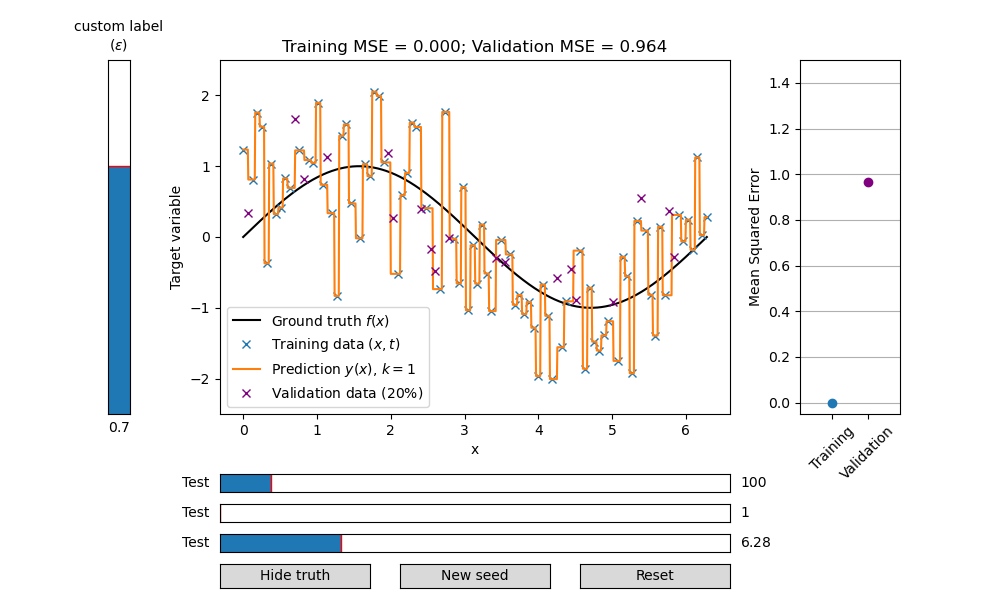

In [6]:
plot = magicplotter(f_data, f_truth, KNN, x_pred, x_pred, val_pct = 20)
plot.add_sliders('eps', 'N', 'k', 'l')
# plot.add_slider('val%')
plot.add_button('truth')
plot.add_button('reset')
plot.add_button('seed')
plot.add_sidebar()
plot.ax.set_ylabel('Target variable')
plot.title = 'Training MSE = {train_mse:.3f}; Validation MSE = {val_mse:.3f}'
plot.val_label = r'Validation data (${val_pct}\%$)'
plot.sliders['eps'].label.set_text('custom label\n' + r'($\varepsilon$)')
plot.show()

In [ ]:
plot.collect_kwargs()

In [ ]:
plot.show()